# Onderzoeksvraag 2

### Doel
De tweede onderzoeksvraag die we willen beantwoorden luidt als volgt:

**In hoeverre kan de IMDB-score van een film worden voorspeld op basis van de sociale media-populariteit van de cast (zoals Facebook-likes) en de bechdeltest rating uit de externe dataset?**  

De gekozen feature- en targetvariabelen en diens meetniveau's zijn als volgt:  
-De targetvariabele is de IMDB-score van de film (discreet, maar kan gebrukt worden als continu)  
-Mogelijke featurevariabelen uit de films dataset zijn: 'film_likes', 'directeur_likes', 'acteur_1_likes', 'acteur_2_likes', 'acteur_3_likes', 'cast_totaal_likes' (allemaal discreet, maar kunnen worden gebruikt als continu).  
-De enige bruikbare feature uit de Bechdeltest dataset is 'rating', welke aangeeft in hoeverre de Bechdeltest slaagt voor de betreffende film.

De regels van de Bechdeltest zijn als volgt:  
1. De film moet 2 vrouwen (die een naam hebben) bevatten.
2. Deze 2 vrouwen moeten met elkaar praten.
3. Over iets anders dan een man.

Deze variabele bevat altijd 1 van de volgende mogelijke getallen: 0, 1, 2 of 3. Dit getal geeft aan of de film 0, 1, 2 of 3 en daarmee alle regels van de Bechdeltest volgt. Alleen bij een waarde van 3 slaagt de Bechdeltest dus. Er is dus een volgorde in de mogelijke waarden, wat zou duiden op een ordinaal meetniveau. Maar we kunnen de variabele ook als discreet beschouwen en gebruiken omdat het uit getallen bestaat, en de volgorde intact is.

### Modelkeuze

De targetvariabele "imdb_score" heeft een discreet meetniveau. Om een discreet meetniveau te voorspellen kunnen we geen gebruik maken van classificatie of clustering. Lineaire regressie kan wel gebruikt worden om de imdb score te voorspellen, dit lijkt ons de beste keuze. Eigenlijk is lineaire regressie bedoeld om variabelen met een continu meetniveau te voorspellen, maar imdb score kan worden beschouwd als een continu targetvariabele omdat het een variabele is met een decimaal.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Inladen en koppelen datasets

We koppelen de data van de films dataset en de Bechdel dataset door een inner join te doen op de titels van de films. Dit resulteert in een tabel met films waarvan het resultaat van de Bechdeltest bekend is. De titel kolom van de films dataset bevatte eerst trailing spaces, maar deze hebben we tijdens de data cleaning fase weggehaald. Als we dit niet gedaan zouden hebben, zou de inner join resulteren in een tabel met 0 rijen.

In [190]:
films = pd.read_csv('films.csv')
films.head()

,titel,directeur,directeur_likes,acteur_1,acteur_1_likes,acteur_2,acteur_2_likes,acteur_3,acteur_3_likes,cast_totaal_likes,film_likes,imdb_score,imdb_id,budget,omzet
0,Avatar,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,7.9,499549,237000000.0,7.605058e+08
1,Pirates of the Caribbean: At World's End,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,7.1,449088,300000000.0,3.094042e+08
2,Spectre,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,6.8,2379713,325850000.0,2.660987e+08
3,The Dark Knight Rises,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,8.5,1345836,250000000.0,4.481306e+08
4,John Carter,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,1873,24000,6.6,401729,263700000.0,7.305868e+07


In [191]:
bechdel = pd.read_csv('bechdel.csv')
bechdel.head()

,title,rating,id,imdbid,year
0,Passage de Venus,0,9602,3155794.0,1874
1,La Rosace Magique,0,9804,14495706.0,1877
2,Sallie Gardner at a Gallop,0,9603,2221420.0,1878
3,Le singe musicien,0,9806,12592084.0,1878
4,Athlete Swinging a Pick,0,9816,7816420.0,1881


In [192]:
# Inner join op de titels van de films
data = pd.merge(films, bechdel, left_on='titel', right_on='title', how='inner')
data

,titel,directeur,directeur_likes,acteur_1,acteur_1_likes,acteur_2,acteur_2_likes,acteur_3,acteur_3_likes,cast_totaal_likes,film_likes,imdb_score,imdb_id,budget,omzet,title,rating,id,imdbid,year
0,Avatar,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,7.9,499549,237000000.0,7.605058e+08,Avatar,3,582,499549.0,2009
1,Spectre,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,6.8,2379713,325850000.0,2.660987e+08,Spectre,1,6519,2379713.0,2015
2,John Carter,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,1873,24000,6.6,401729,263700000.0,7.305868e+07,John Carter,3,3108,401729.0,2012
3,Spider-Man 3,Sam Raimi,0.0,J.K. Simmons,24000.0,James Franco,11000.0,Kirsten Dunst,4000.0,46055,0,6.2,413300,258000000.0,3.365303e+08,Spider-Man 3,2,5483,413300.0,2007
4,Tangled,Nathan Greno,15.0,Brad Garrett,799.0,Donna Murphy,553.0,M.C. Gainey,284.0,2036,29000,7.8,398286,260000000.0,2.008073e+08,Tangled,3,1782,398286.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,Slacker,Richard Linklater,0.0,Tommy Pallotta,5.0,Richard Linklater,0.0,Jean Caffeine,0.0,5,2000,7.1,102943,23000.0,1.227508e+06,Slacker,3,1846,102943.0,1991
1905,Breaking Upwards,Daryl Wein,38.0,Zoe Lister-Jones,331.0,Heather Burns,212.0,Ebon Moss-Bachrach,211.0,1546,324,6.2,1247644,15000.0,7.638200e+04,Breaking Upwards,3,8593,1247644.0,2009
1906,Pink Flamingos,John Waters,0.0,Divine,462.0,Mink Stole,143.0,Edith Massey,105.0,760,0,6.1,69089,10000.0,1.804830e+05,Pink Flamingos,3,708,69089.0,1972
1907,Primer,Shane Carruth,291.0,Shane Carruth,291.0,David Sullivan,45.0,Casey Gooden,8.0,368,19000,7.0,390384,7000.0,4.247600e+05,Primer,1,1420,390384.0,2004


Het resultaat is een tabel met 1909 matchende films die in beide datasets voorkomen. Dit zou genoeg kunnen zijn om een model op te kunnen trainen, maar er is een manier om mogelijk nog meer matches te krijgen. In de Bechdel dataset worden titels van films met een voorvoegsel anders opgeslagen dan in de films dataset. Zo wordt in de de films dataset "The Hangover " opgeslagen, maar in de Bechdel datset "Hangover, The". Dit resulteert natuurlijk niet in een match wanneer we de inner join doen. Om dit probleem op te lossen gaan we de inner join niet op de titel van de films doen, maar op de IMDB ID's van de films. De films dataset bevat namelijk een kolom "movie_imdb_link". In deze link staat altijd het IMDB ID van de film. In de data preparation fase hebben we deze link al naar een IMDB ID geconverteert (dit is de "imdb_id" kolom). De Bechdel dataset bevat een kolom "imdbid" waar het IMDB ID van de film staat. Als we deze 2 kolommen op elkaar matches met de inner join zouden we meer rijen moeten krijgen.

In [195]:
# Inner join op de ID's van de films
data = pd.merge(films, bechdel, left_on='imdb_id', right_on='imdbid', how='inner')
data

,titel,directeur,directeur_likes,acteur_1,acteur_1_likes,acteur_2,acteur_2_likes,acteur_3,acteur_3_likes,cast_totaal_likes,film_likes,imdb_score,imdb_id,budget,omzet,title,rating,id,imdbid,year
0,Avatar,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,4834,33000,7.9,499549,2.370000e+08,7.605058e+08,Avatar,3,582,499549.0,2009
1,Pirates of the Caribbean: At World's End,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,48350,0,7.1,449088,3.000000e+08,3.094042e+08,Pirates of the Caribbean: At World&#39;s End,3,169,449088.0,2007
2,Spectre,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,11700,85000,6.8,2379713,3.258500e+08,2.660987e+08,Spectre,1,6519,2379713.0,2015
3,The Dark Knight Rises,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,106759,164000,8.5,1345836,2.500000e+08,4.481306e+08,"Dark Knight Rises, The",1,3437,1345836.0,2012
4,John Carter,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,1873,24000,6.6,401729,2.637000e+08,7.305868e+07,John Carter,3,3108,401729.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,Pink Flamingos,John Waters,0.0,Divine,462.0,Mink Stole,143.0,Edith Massey,105.0,760,0,6.1,69089,1.000000e+04,1.804830e+05,Pink Flamingos,3,708,69089.0,1972
2576,The Circle,Jafar Panahi,397.0,Fereshteh Sadre Orafaiy,5.0,Nargess Mamizadeh,0.0,Mojgan Faramarzi,0.0,5,697,7.5,255094,2.400000e-01,1.599000e+01,"Circle, The",3,2234,255094.0,2000
2577,The Cure,Kiyoshi Kurosawa,62.0,Kôji Yakusho,89.0,Anna Nakagawa,13.0,Denden,6.0,115,817,7.4,123948,6.900000e+03,6.527100e+02,Cure,1,7174,123948.0,1997
2578,Primer,Shane Carruth,291.0,Shane Carruth,291.0,David Sullivan,45.0,Casey Gooden,8.0,368,19000,7.0,390384,7.000000e+03,4.247600e+05,Primer,1,1420,390384.0,2004


Op deze manier krijgen we 2580 matches, dit is significant meer dan de eerdere 1909 matches en zal dus een beter model mogelijk maken.

# Correlatie onderzoek

Om erachter te komen welke featurevariabelen we het beste kunnen kiezen voor het model, doen we nog een correlatie onderzoek. We zijn specifiek geïnteresseerd in de correlatie van imdb_score (de targetvariabele) met de featurevariabelen. De featurevariabelen die we gaan onderzoeken zijn alle variabelen die te maken hebben met facebook likes, en de rating variabele uit de externe dataset.

In [196]:
# Eventueel correlatieonderzoek
kolommen = data[['film_likes', 'directeur_likes', 
       'acteur_1_likes', 'acteur_2_likes', 
       'acteur_3_likes', 'cast_totaal_likes', 'rating', 'imdb_score']]

kolommen.corr()

,film_likes,directeur_likes,acteur_1_likes,acteur_2_likes,acteur_3_likes,cast_totaal_likes,rating,imdb_score
film_likes,1.000000,0.164584,0.115528,0.217333,0.257186,0.189325,0.008143,0.286740
directeur_likes,0.164584,1.000000,0.083273,0.121508,0.124823,0.117352,-0.044826,0.212360
acteur_1_likes,0.115528,0.083273,1.000000,0.385594,0.248704,0.942074,-0.041734,0.074853
acteur_2_likes,0.217333,0.121508,0.385594,1.000000,0.543929,0.643622,-0.021972,0.076774
acteur_3_likes,0.257186,0.124823,0.248704,0.543929,1.000000,0.490278,0.024292,0.052541
cast_totaal_likes,0.189325,0.117352,0.942074,0.643622,0.490278,1.000000,-0.034063,0.083972
rating,0.008143,-0.044826,-0.041734,-0.021972,0.024292,-0.034063,1.000000,-0.089989
imdb_score,0.286740,0.212360,0.074853,0.076774,0.052541,0.083972,-0.089989,1.000000


Het valt op dat de featurevariabele "rating" negatief correleert met "imdb_score". Dit lijkt te betekenen dat rating een negatieve invloed zal hebben op het model. Om deze lage correlatie visueel te laten zien, maken we een scatter plot tussen deze 2 variabelen.

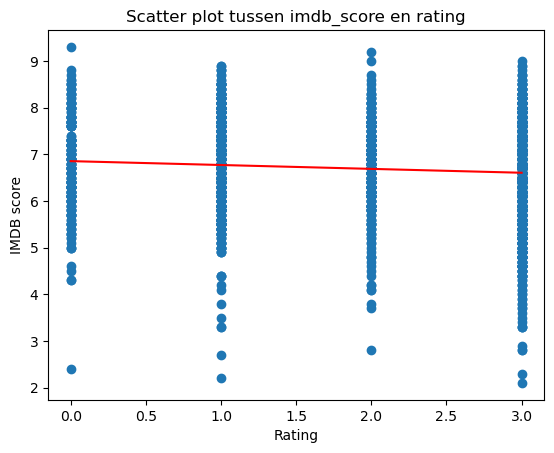

In [197]:
# Scatter plot tussen rating en imdb_score
plt.scatter(data['rating'], data['imdb_score'])

plt.title('Scatter plot tussen imdb_score en rating')
plt.xlabel('Rating')
plt.ylabel('IMDB score')

# Lijn voor de beste fit
m, b = np.polyfit(data['rating'], data['imdb_score'], 1)
plt.plot(data['rating'], m * np.array(data['rating']) + b, color='red')

plt.show()

Daarnaast valt het op dat film_likes het sterkst correleert met imdb_score, maar met een score van 0.28 is dit niet heel sterk. Daarnaast heeft directeur_likes ook wat correlatie, met een score van 0.21. De individuele acteur likes correleren allemaal zwak met imdb_score. Het valt wel op dat wanneer we de likes van de acteurs bij elkaar optellen in de cast_totaal_likes kolom, dit een iets sterkere correlatie geeft dan wanneer we de acteur likes als individuele variabelen behandelen.

De correlaties tussen targetvariabele imdb_score en featurevariabelen film_likes, directeur_likes, en cast_totaal_likes laten we ook zien door middel van scatter plots:

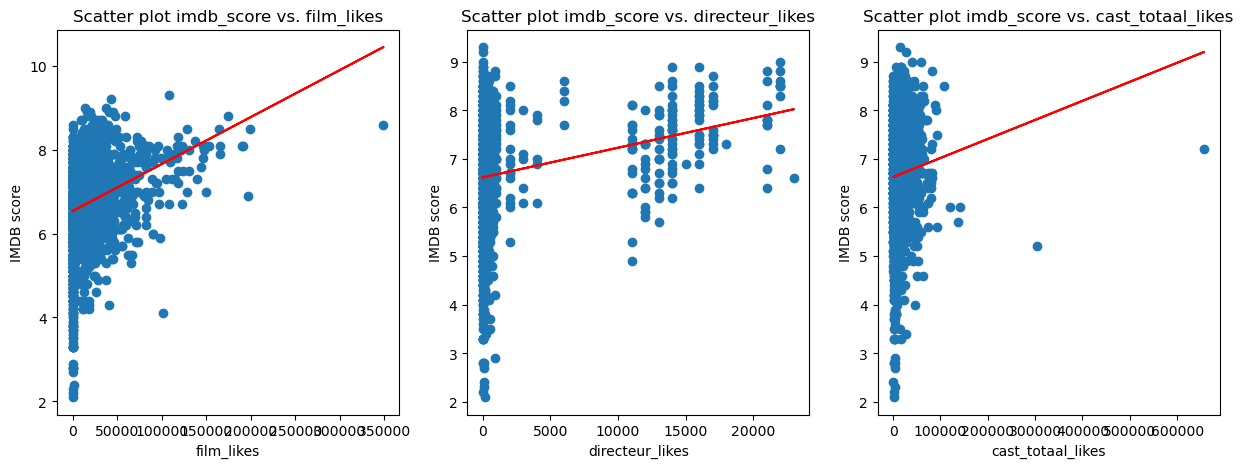

In [198]:
# Scatter plots imdb_score vs. film_likes, directeur_likes, en cast_totaal_likes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(data['film_likes'], data['imdb_score'])
axes[0].set_title('Scatter plot imdb_score vs. film_likes')
axes[0].set_xlabel('film_likes')
axes[0].set_ylabel('IMDB score')

m, b = np.polyfit(data['film_likes'], data['imdb_score'], 1)
axes[0].plot(data['film_likes'], m * np.array(data['film_likes']) + b, color='red')

axes[1].scatter(data['directeur_likes'], data['imdb_score'])
axes[1].set_title('Scatter plot imdb_score vs. directeur_likes')
axes[1].set_xlabel('directeur_likes')
axes[1].set_ylabel('IMDB score')

m, b = np.polyfit(data['directeur_likes'], data['imdb_score'], 1)
axes[1].plot(data['directeur_likes'], m * np.array(data['directeur_likes']) + b, color='red')

axes[2].scatter(data['cast_totaal_likes'], data['imdb_score'])
axes[2].set_title('Scatter plot imdb_score vs. cast_totaal_likes')
axes[2].set_xlabel('cast_totaal_likes')
axes[2].set_ylabel('IMDB score')

m, b = np.polyfit(data['cast_totaal_likes'], data['imdb_score'], 1)
plt.plot(data['cast_totaal_likes'], m * np.array(data['cast_totaal_likes']) + b, color='red')

plt.show()

Deze correlaties brengen ons tot de volgende keuze van variabelen:  
Targetvariabele:
- imdb_score  

Featurevariabelen:
- film_likes
- directeur_likes
- cast_totaal_likes
- rating

# Baseline model

Als baseline model nemen het gemiddelde van de targetvariabele imdb_score, en kijken we hoe goed dit model scoort. Daarna gaan we kijken of we deze score met het lineaire regressie model kunnen verbeteren.

In [199]:
# Gemiddelde targetvariabele imdb_score bepalen
imdb_gem = data['imdb_score'].mean()
print(f"Gemiddelde IMDB rating: {imdb_gem}")

Gemiddelde IMDB rating: 6.677635658914729


Nu we het baseline model hebben, gaan we kijken hoe goed deze is. Dit bepalen we aan de hand van de RMSE.

In [200]:
# Maak en vul een array met de gemiddelde imdb_score, even lang als de imdb_score series.
pred_scores = np.full_like(data['imdb_score'], imdb_gem)

# Berekenen RMSE
baseline_rmse = np.sqrt(mean_squared_error(data['imdb_score'], pred_scores))
print(f"RMSE-score van het baseline model: {baseline_rmse}")

RMSE-score van het baseline model: 0.9669899708320051


Een RMSE-score van ongeveer 0,97 betekent dat de gemiddelde fout van dit model 0.97 eenheden bedraagt. Aangezien de targetvariabele imdb_score altijd tussen de 1 en 10 ligt, is een gemiddelde fout van 0,97 best groot. Het doel is nu om met lineaire regressie een model te maken dat beter scoort.

# Lineair regressie model

In [201]:
# Maak en run het lineaire regressie model met de gekozen features
features = data[['film_likes', 'directeur_likes', 'cast_totaal_likes', 'rating']]

target = data['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1337)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [202]:
# Testen van het model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

RMSE: 0.9249321768785288


Met de gekozen features komen we uit op een RMSE van ongeveer 0,92. Dit beter dan het baseline model, maar niet heel veel beter. Eerder hebben we gezien dat de rating feature negatief correleert met de targetvariabele. Het lijkt dus interessant om te kijken of het model beter zou scoren zonder deze feature.

In [203]:
# Lineair regressie model zonder de rating feature
features = data[['film_likes', 'directeur_likes', 'cast_totaal_likes']]

target = data['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1337)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [204]:
# Testen van het model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

RMSE: 0.9286704299086277


Dit nieuwe model scoort net iets slechter dan het vorige. De rating feature lijkt dus toch van positieve invloed te zijn op het model, ook al is dit verschil in de praktijk zo ongeveer verwaarloosbaar.

# Conclusie

Het doel van dit onderzoek was om te kijken in hoeverre de facebook-populariteit en het slagen van de Bechdeltest gebruikt kan worden om de imdb score van een film te voorspellen.

We hebben ondekt dat de imdb score lastig te voorspellen is aan de hand van deze variabelen; het model scoort marginaal beter dan het baseline model. We hebben het baseline model wel verbeterd, maar in de praktijk lijkt het lineaire regressie-model vrij waardeloos te zijn, omdat een voorspelling gemiddeld 0,92 punt naast de daadwerkelijke imdb score zit. Omdat een imdb score altijd tussen de 1 en 10 ligt, lijkt dit ons een te grote foutmarge om in de praktijk te kunnen gebruiken.